In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
image_path = "strawberry.jpg"  
image = cv2.imread(image_path)

In [11]:
# Mengonversi gambar ke ruang warna CIELAB
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Memecah saluran L, A, B
l_channel, a_channel, b_channel = cv2.split(lab_image)

In [12]:
def calculate_histogram(channel):
    histogram = np.zeros(256, dtype=int)  # Inisialisasi array untuk histogram
    for value in channel.ravel():  # Iterasi semua nilai piksel dalam saluran
        histogram[value] += 1
    return histogram

In [13]:
# Hitung histogram untuk setiap saluran
l_hist = calculate_histogram(l_channel)
a_hist = calculate_histogram(a_channel)
b_hist = calculate_histogram(b_channel)

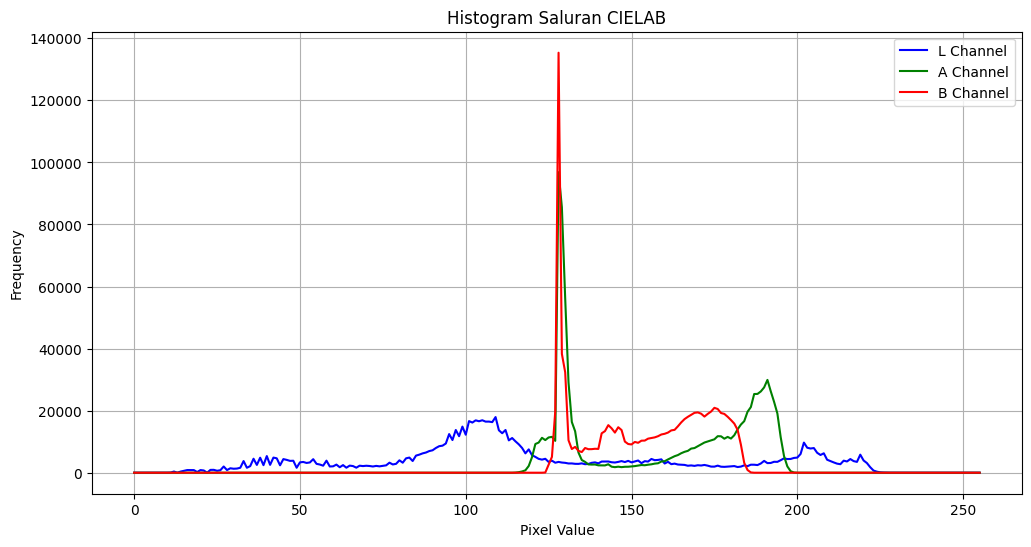

In [14]:
# Plot histogram
plt.figure(figsize=(12, 6))
plt.plot(l_hist, label="L Channel", color="blue")
plt.plot(a_hist, label="A Channel", color="green")
plt.plot(b_hist, label="B Channel", color="red")
plt.title("Histogram Saluran CIELAB")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

In [15]:
def plot_histogram(image, title, channel_labels):
    plt.figure(figsize=(12, 6))
    for i, label in enumerate(channel_labels):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, label=f"{label} Channel")
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()
    plt.show()

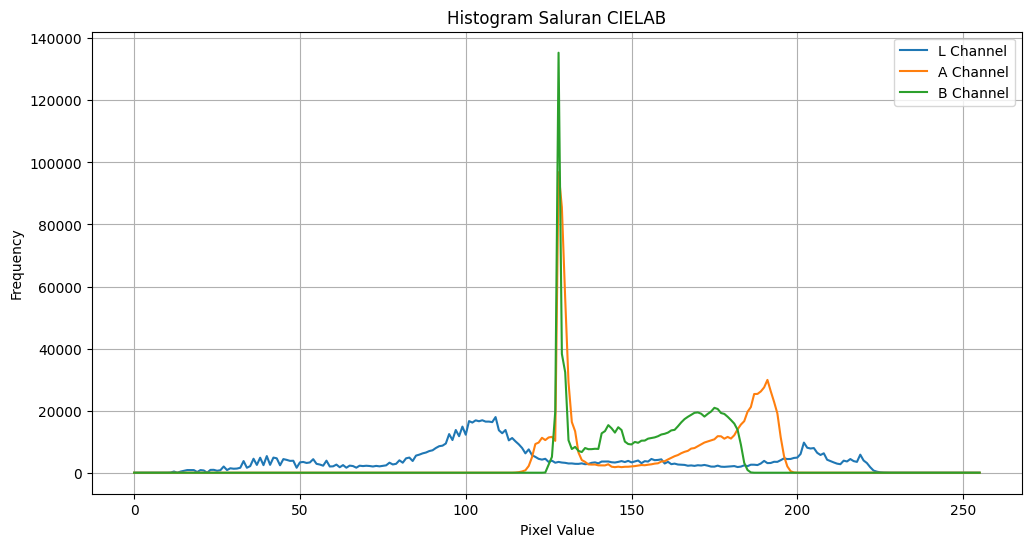

In [16]:
plot_histogram(lab_image, "Histogram Saluran CIELAB", ["L", "A", "B"])

In [38]:
l_channel_brightened = l_channel + 100

lab_image_brightened = cv2.merge((l_channel_brightened, a_channel, b_channel))

Text(0.5, 1.0, 'Gambar CIELAB add brightness')

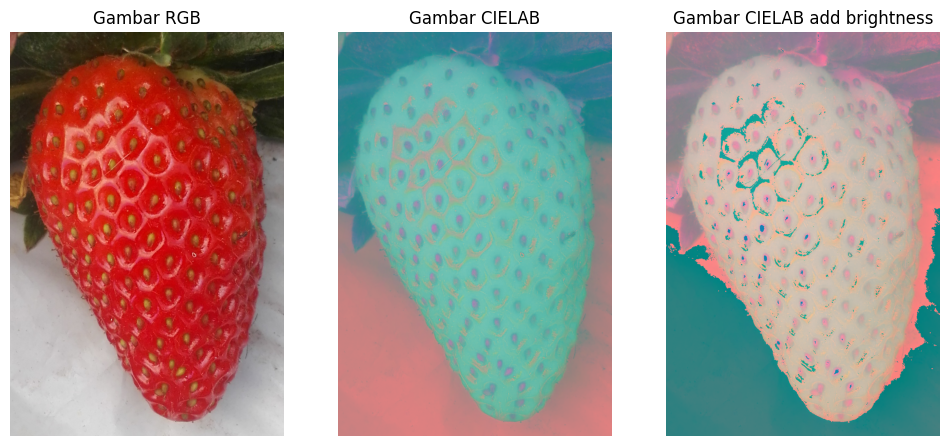

In [39]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Gambar RGB")

plt.subplot(1, 3, 2)
plt.imshow(lab_image)
plt.axis('off')
plt.title("Gambar CIELAB")

plt.subplot(1, 3, 3)
plt.imshow(lab_image_brightened)
plt.axis('off')
plt.title("Gambar CIELAB add brightness")